# Exploratory Analysis of Email Spam Dataset

## Setting

In [2]:
# Import relevant libraries
# install.packages("openintro")
library(ggplot2)
library(dplyr)
library(openintro)

options(scipen=999)

In [3]:
# Preview the data
head(email)


spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,2012-01-01 06:16:41,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 07:03:59,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 16:00:32,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 09:09:49,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 10:00:01,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 10:04:46,0,0,0,no,...,0,2,1.091,25,0,0,0,0,1,none


In [4]:
# Preview the structure of the data
str(email)

tibble [3,921 x 21] (S3: tbl_df/tbl/data.frame)
 $ spam        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ to_multiple : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ from        : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ cc          : int [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ sent_email  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ time        : POSIXct[1:3921], format: "2012-01-01 06:16:41" "2012-01-01 07:03:59" ...
 $ image       : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ attach      : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ dollar      : num [1:3921] 0 0 4 0 0 0 0 0 0 0 ...
 $ winner      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ inherit     : num [1:3921] 0 0 1 0 0 0 0 0 0 0 ...
 $ viagra      : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ password    : num [1:3921] 0 0 0 0 2 2 0 0 0 0 ...
 $ num_char    : num [1:3921] 11.37 10.5 7.77 13.26 1.23 ...
 $ line_breaks : int [1:3921] 202 202 192 255 29 25 193 237 69 68 ...
 $ fo

## Visual Exploration

**Visual exploration of num_char and message type**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


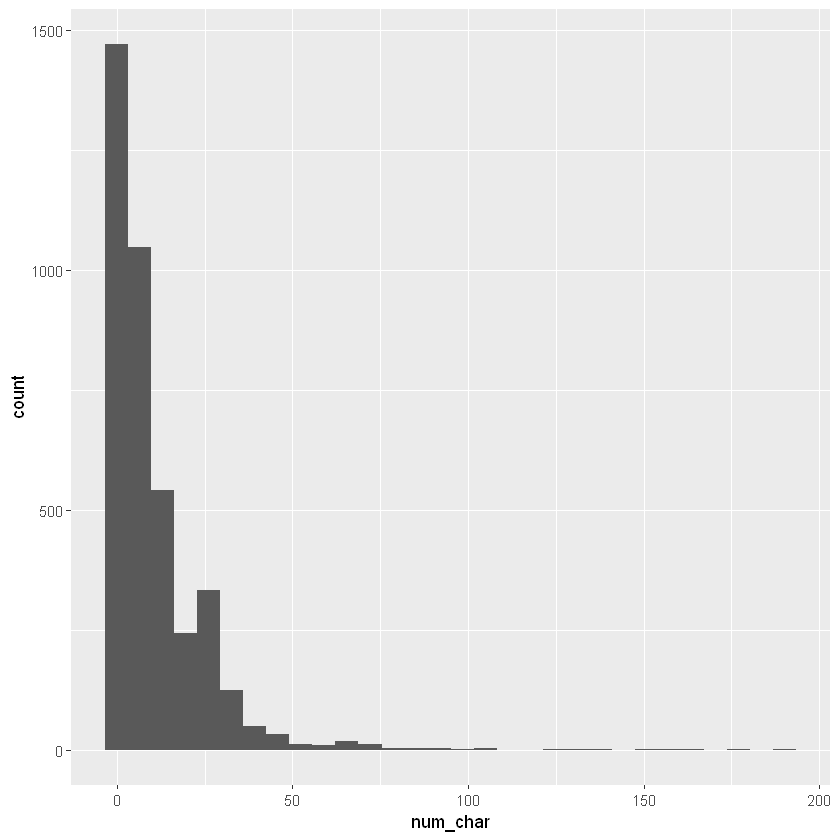

In [17]:
# Histogram
ggplot(email, aes(x = num_char)) +
geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


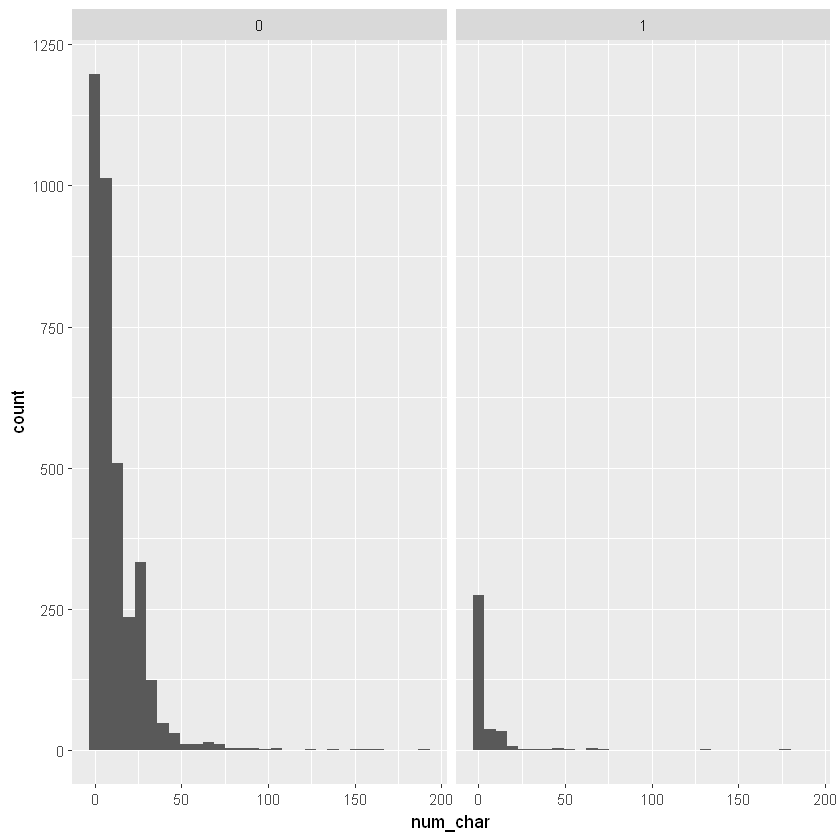

In [20]:
# Histograms with facets
ggplot(email, aes(x = num_char)) +
geom_histogram() +
facet_wrap(~spam)

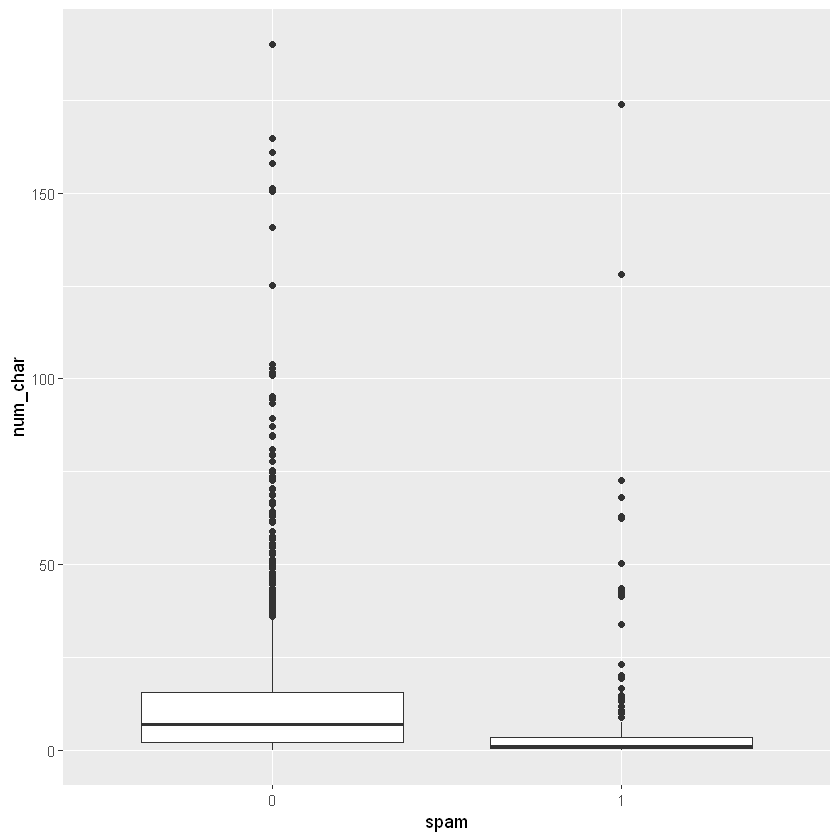

In [21]:
# Box Plot
ggplot(email, aes(x = spam, y = num_char)) +
geom_boxplot()

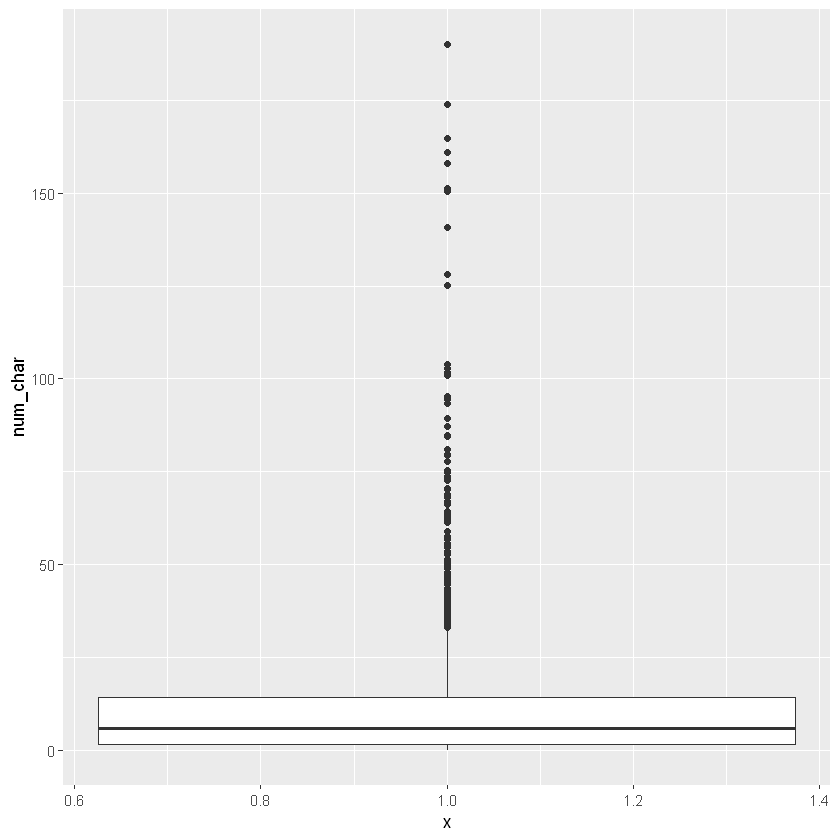

In [22]:
# To get a single box plot
ggplot(email, aes(x = 1, y = num_char)) +
geom_boxplot()

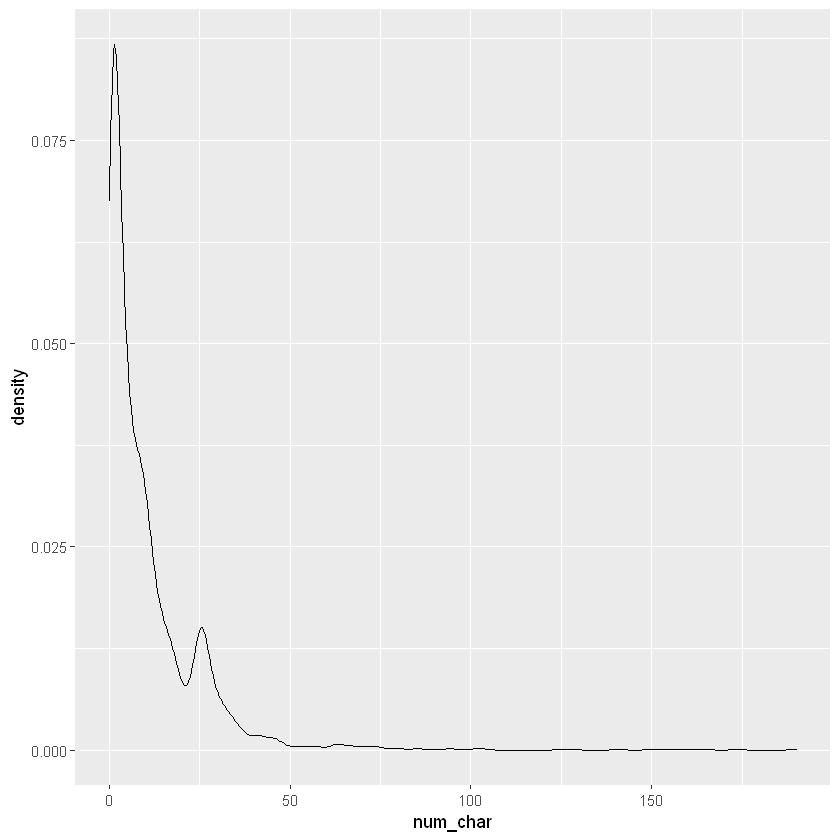

In [23]:
# Density Plot
ggplot(email, aes(x = num_char)) +
geom_density()

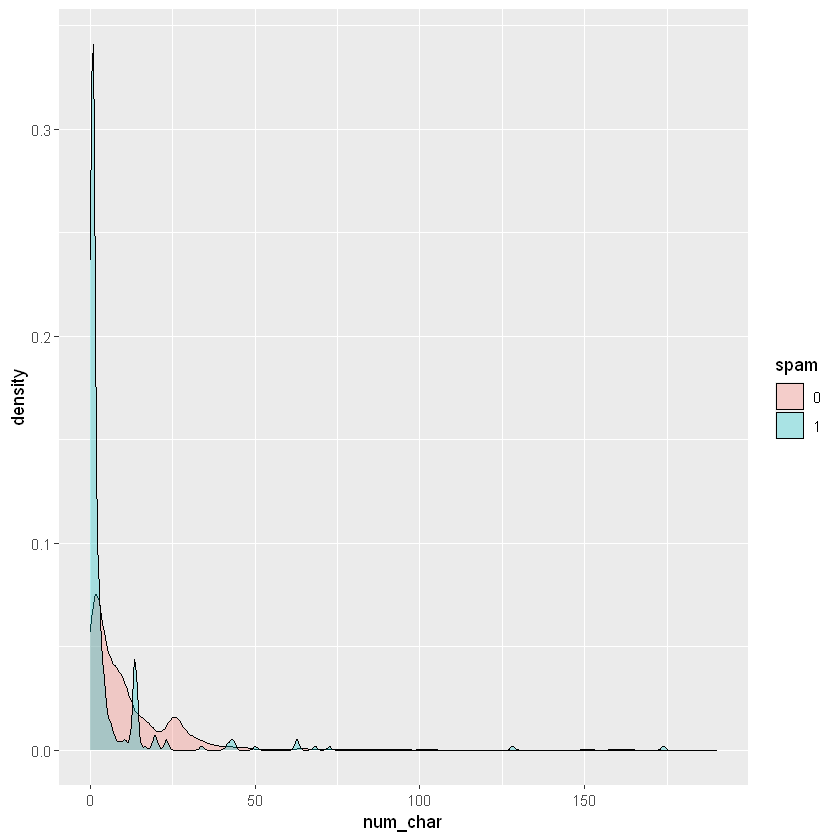

In [24]:
# Desnsity plot
ggplot(email, aes(x = num_char, fill = spam)) +
geom_density(alpha = .3)

## Checking for Association between variables

**Is there an association between spam and the length of an email**

In [13]:
# Computing an appropriate measures of the center and spread of 'num_char' for both spam and not-spam using group_by() and summarize()
email %>%
  group_by(spam) %>%
  summarize(n(), mean(num_char), sd(num_char), median(num_char), IQR(num_char))

spam,n(),mean(num_char),sd(num_char),median(num_char),IQR(num_char)
0,3554,11.250517,14.51076,6.831,13.58225
1,367,5.439204,14.92010,1.046,2.81800


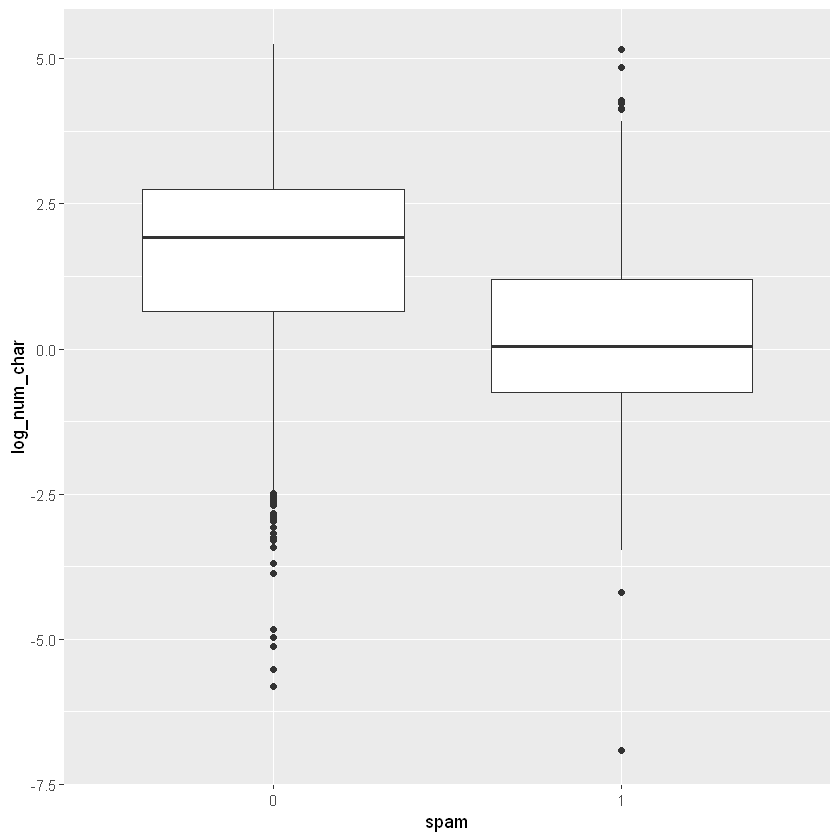

In [11]:
# Constructing a side-by-side box plots to visualize the association between the same two variables.
email %>%
  mutate(log_num_char = log(num_char)) %>%
  ggplot(aes(x = spam, y = log_num_char)) +
  geom_boxplot()

- This shows that, the median length of not-spam emails is greater than that of spam emails.

- Thus a typical spam message is shorter than non-spam message

**Exclamation marks as an obvious indicator of spam**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


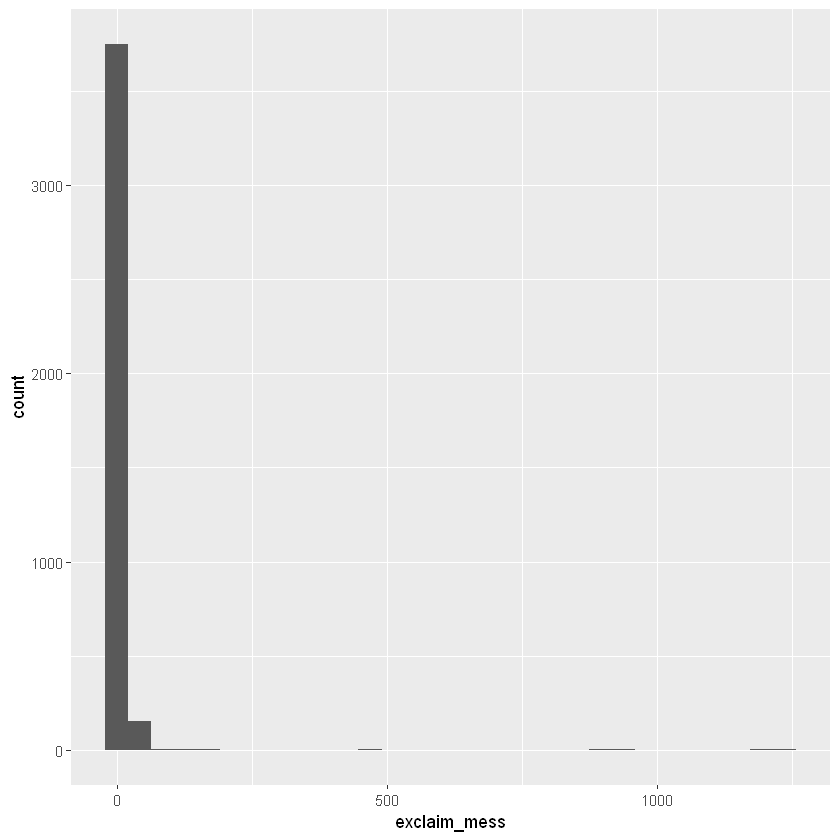

In [36]:
# Get a sense of the distribution of exclaim_mess - Histogram
ggplot(email, aes(x = exclaim_mess)) +
geom_histogram()

In [15]:
# Compute center and spread for exclaim_mess by spam
email %>%
  group_by(spam) %>%
  summarize(median(exclaim_mess), IQR(exclaim_mess))

spam,median(exclaim_mess),IQR(exclaim_mess)
0,1,5
1,0,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


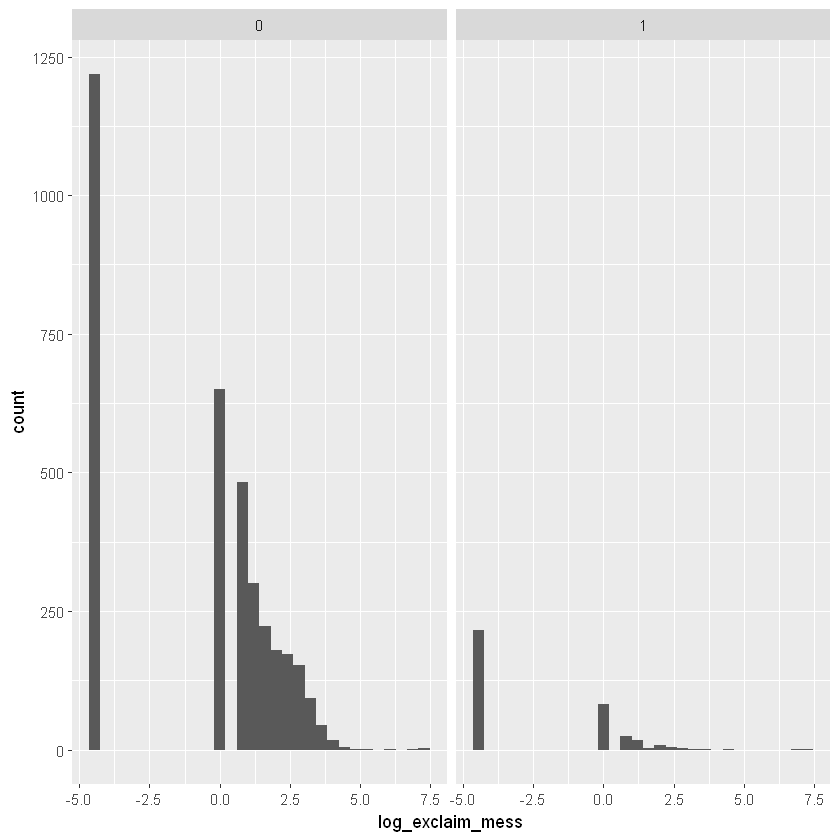

In [16]:
# Create plot for spam and exclaim_mess
# log(0) is -Inf in R, which isn't a very useful value! You can get around this by adding a small number (like 0.01) to the quantity inside the log() function

email %>%
mutate(log_exclaim_mess = log(0.01+ exclaim_mess)) %>%
ggplot(aes(x = log_exclaim_mess)) +
geom_histogram() +
facet_wrap(~ spam)

We see that, 
- Even after a transformation, the distribution of exclaim_mess in both classes of email is right-skewed.
- The typical number of exclamations in the not-spam group appears to be slightly higher than in the spam group.
- The most common value of exclaim_mess in both classes of email is zero (a log(exclaim_mess) of -4.6 after adding .01).

**Cases where exclaim_mess in both classes of email is zero (a log(exclaim_mess) of -4.6 after adding .01)**

- Analyze the zeros and the non-zeros seperately
- Treat as two level categorical variables: zeros and non-zeros 

spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,1,0,0,2012-01-01 06:16:41,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
0,0,1,0,0,2012-01-01 07:03:59,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
0,0,1,0,0,2012-01-01 16:00:32,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
0,0,1,0,0,2012-01-01 09:09:49,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
0,0,1,0,0,2012-01-01 10:00:01,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
0,0,1,0,0,2012-01-01 10:04:46,0,0,0,no,...,0,2,1.091,25,0,0,0,0,1,none


tibble [3,921 x 21] (S3: tbl_df/tbl/data.frame)
 $ spam        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ to_multiple : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ from        : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ cc          : int [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ sent_email  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ time        : POSIXct[1:3921], format: "2012-01-01 06:16:41" "2012-01-01 07:03:59" ...
 $ image       : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ attach      : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ dollar      : num [1:3921] 0 0 4 0 0 0 0 0 0 0 ...
 $ winner      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ inherit     : num [1:3921] 0 0 1 0 0 0 0 0 0 0 ...
 $ viagra      : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ password    : num [1:3921] 0 0 0 0 2 2 0 0 0 0 ...
 $ num_char    : num [1:3921] 11.37 10.5 7.77 13.26 1.23 ...
 $ line_breaks : int [1:3921] 202 202 192 255 29 25 193 237 69 68 ...
 $ fo

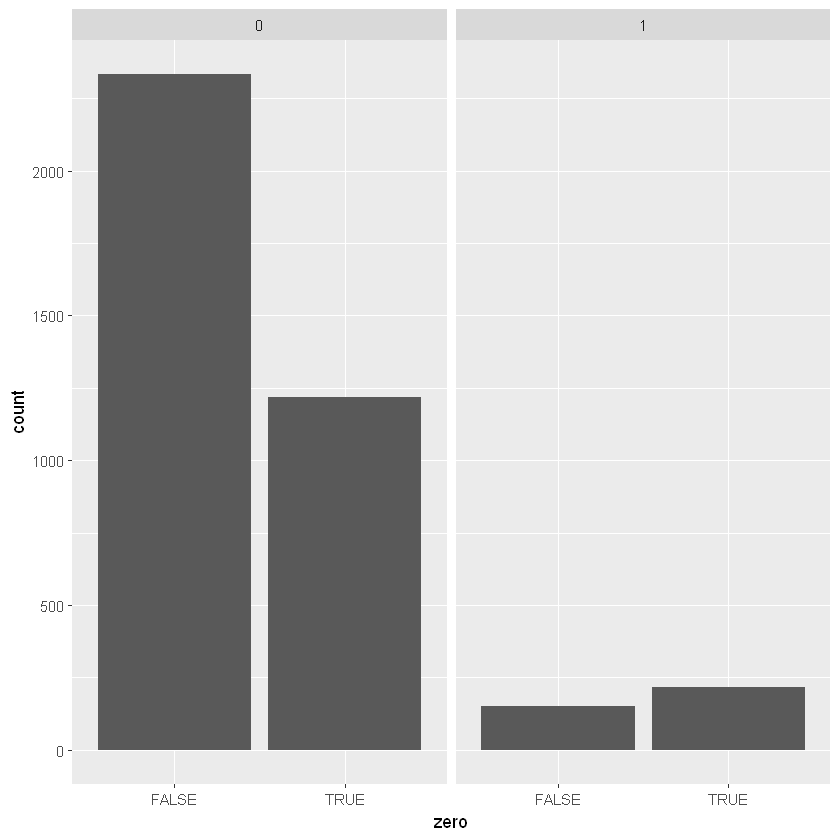

In [29]:
# 
email %>%
mutate(zero = exclaim_mess == 0) %>%
ggplot(aes(x = zero)) +
geom_bar() +
facet_wrap(~spam)

head(email)
str(email)

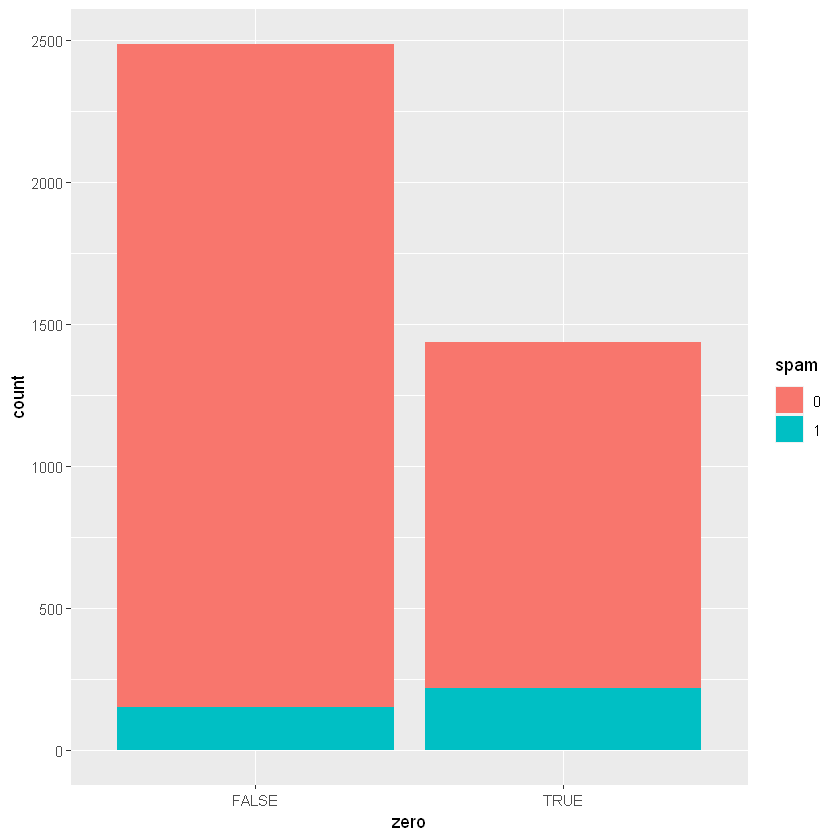

In [26]:
# Using a stacked barchart
email %>%
    mutate(zero = exclaim_mess == 0) %>%
    ggplot(aes(x = zero, fill = spam)) +
    geom_bar()

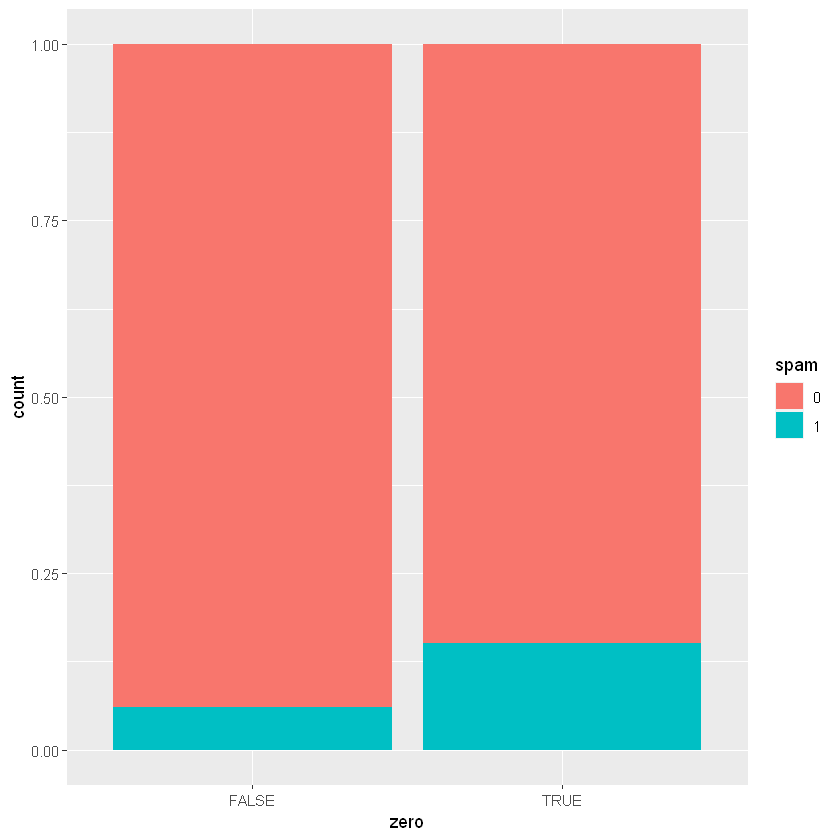

In [27]:
# Proportion Stacked barchart
email %>%
    mutate(zero = exclaim_mess == 0) %>%
    ggplot(aes(x = zero, fill = spam)) +
    geom_bar(position = "fill")

### Association between email with images and whether or not it is a spam or not

In [31]:
# get a sense of distribution of emails with images
table(email$image)


   0    1    2    3    4    5    9   20 
3811   76   17   11    2    2    1    1 

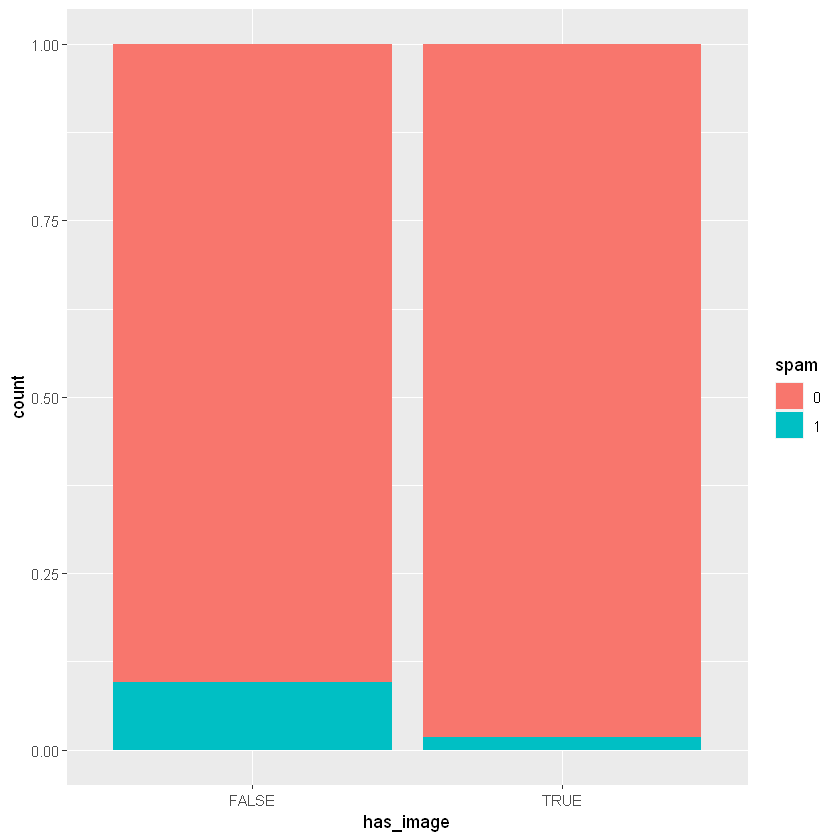

In [56]:
# Create plot of proportion of spam by image
email %>%
  mutate(has_image = image >0) %>%  # new variable that is TRUE where the number of images is greater than zero and FALSE otherwise.
  ggplot(aes(x = has_image, fill = spam)) +  # visualize the relationship between has_image and spam.
  geom_bar(position = "fill")

#ggplot(aes(x = as.factor(has_image), fill = spam)) +

We can see that an email without an image is more likely to be not-spam than spam.

**Check whether or not images are counted as attachment or not**

In [40]:
# Test if images are count as attachments or not
sum(email$image<0)
sum(email$attach<0)

[1] 0

[1] 0

Since number of image is never greater than attach, we can infer that images are counted as attachments

**Within non-spam emails, is the typical length of emails shorter for those that were sent to multiple people**

In [42]:
str(email)

tibble [3,921 x 21] (S3: tbl_df/tbl/data.frame)
 $ spam        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ to_multiple : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ from        : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ cc          : int [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ sent_email  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ time        : POSIXct[1:3921], format: "2012-01-01 06:16:41" "2012-01-01 07:03:59" ...
 $ image       : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ attach      : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ dollar      : num [1:3921] 0 0 4 0 0 0 0 0 0 0 ...
 $ winner      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ inherit     : num [1:3921] 0 0 1 0 0 0 0 0 0 0 ...
 $ viagra      : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ password    : num [1:3921] 0 0 0 0 2 2 0 0 0 0 ...
 $ num_char    : num [1:3921] 11.37 10.5 7.77 13.26 1.23 ...
 $ line_breaks : int [1:3921] 202 202 192 255 29 25 193 237 69 68 ...
 $ fo

In [46]:
email %>%
   filter(spam == 0) %>%
   group_by(to_multiple) %>%
   summarize(median(num_char))

to_multiple,median(num_char)
0,7.1960
1,5.3645


"yes": the typical length of non-spam sent to multiple people is a bit lower than those sent to only one person.

### Email and presence of dollars

**Does a typical spam email contain a greater number of occurrences of the word "dollar" as compared with non-spam email?**

In [47]:
# Summary stats for the email with dollars
email %>%
  filter(dollar >0 ) %>%
  group_by(spam) %>%
  summarize(n())

spam,n()
0,668
1,78


**For email with greater than 10 occurrences of the word "dollar", is it more likely to be spam or not-spam?**

spam,n()
0,173
1,3


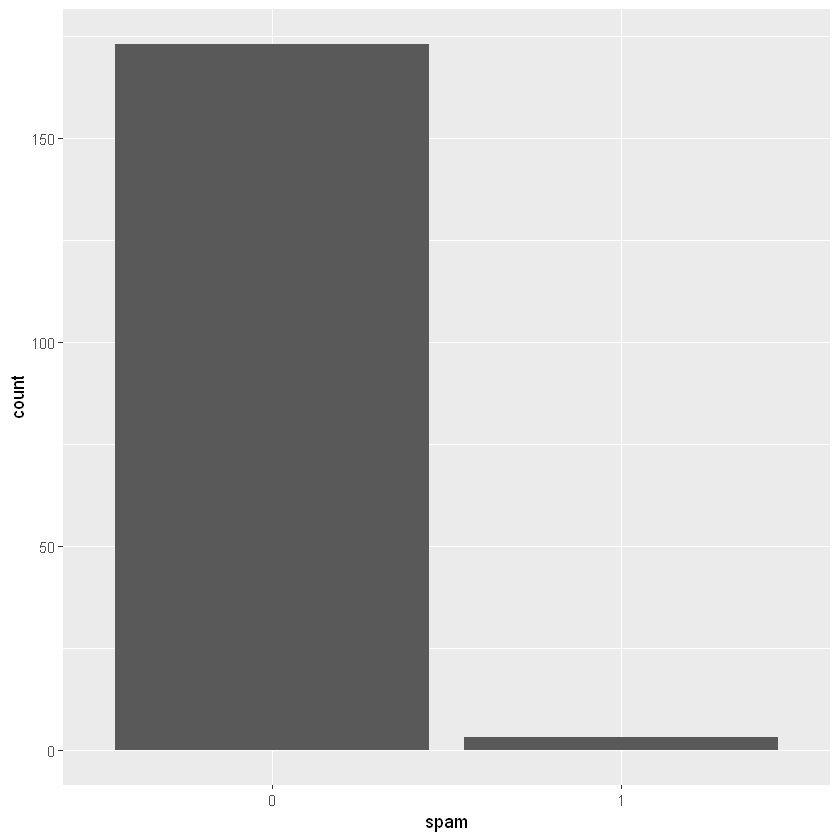

In [50]:
# Summary statistics and plot
email %>%
  filter(dollar >10) %>%
  group_by(spam) %>%
  summarize(n())

email %>%
  filter(dollar >10) %>%
  ggplot(aes(x = spam)) +
  geom_bar()

## Ordering Bars

**Ordering levels of "number" variable**

[1] "none"  "small" "big"

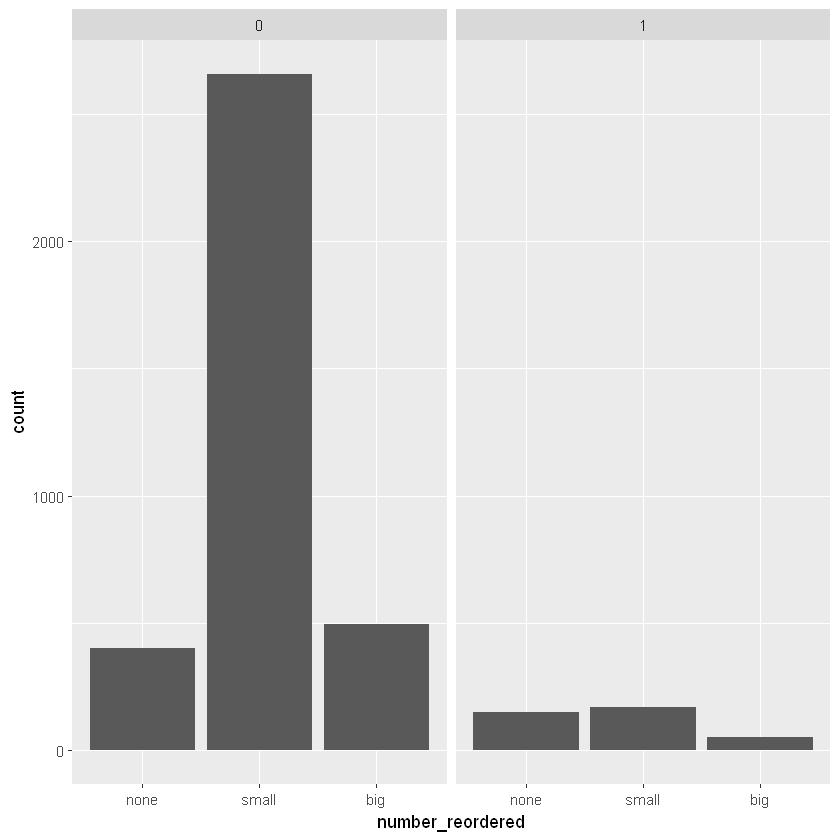

In [66]:
# Reorder levels
email$number_reordered <- factor(email$number,levels = c("none","small","big"))
levels(email$number_reordered)

# Construct plot of number_reordered
ggplot(email, aes(x = number_reordered)) +
  geom_bar() +
  facet_wrap(~spam)

**Creating and ordering levels**

In [62]:
# Create new condition for exclaim_mess and save it back into the data
email <- email %>%
    mutate(zero = exclaim_mess == 0)
    levels(email$zero)

NULL

In [64]:
str(email)

tibble [3,921 x 22] (S3: tbl_df/tbl/data.frame)
 $ spam        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ to_multiple : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ from        : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ cc          : int [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ sent_email  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 2 1 1 ...
 $ time        : POSIXct[1:3921], format: "2012-01-01 06:16:41" "2012-01-01 07:03:59" ...
 $ image       : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ attach      : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ dollar      : num [1:3921] 0 0 4 0 0 0 0 0 0 0 ...
 $ winner      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ inherit     : num [1:3921] 0 0 1 0 0 0 0 0 0 0 ...
 $ viagra      : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ password    : num [1:3921] 0 0 0 0 2 2 0 0 0 0 ...
 $ num_char    : num [1:3921] 11.37 10.5 7.77 13.26 1.23 ...
 $ line_breaks : int [1:3921] 202 202 192 255 29 25 193 237 69 68 ...
 $ fo

In [59]:
# Set the levels to factor
email$zero <- factor(email$zero,levels = c("TRUE","FALSE"))
levels(email$zero)

[1] "TRUE"  "FALSE"

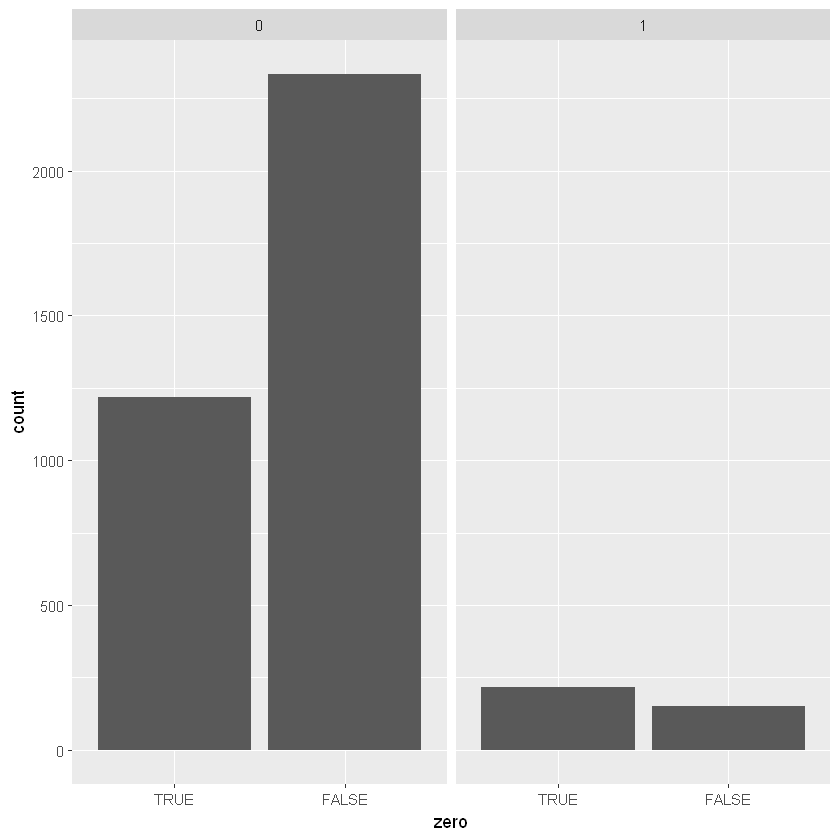

In [60]:
email %>%
    ggplot(aes(x = zero)) +
    geom_bar() +
    facet_wrap(~spam)

- Given that an email contains a small number, it is more likely to be not-spam.
- Given that an email contains a big number, it is more likely to be not-spam.
- Within both spam and not-spam, the most common number is a small one.